In [225]:
import pandas as pd
from home_insurance.config import config
from home_insurance.constants import *
print(config.DATA_PATH)
data = pd.read_csv(config.DATA_PATH)


C:\data\esure\home-insurance\home_insurance.csv


In [226]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
QUOTE_DATE                129524 non-null object
COVER_START               189021 non-null object
CLAIM3YEARS               190039 non-null object
P1_EMP_STATUS             189021 non-null object
P1_PT_EMP_STATUS          1782 non-null object
BUS_USE                   189021 non-null object
CLERICAL                  2944 non-null object
AD_BUILDINGS              189021 non-null object
RISK_RATED_AREA_B         140876 non-null float64
SUM_INSURED_BUILDINGS     189021 non-null float64
NCD_GRANTED_YEARS_B       189021 non-null float64
AD_CONTENTS               189021 non-null object
RISK_RATED_AREA_C         180290 non-null float64
SUM_INSURED_CONTENTS      189021 non-null float64
NCD_GRANTED_YEARS_C       189021 non-null float64
CONTENTS_COVER            189021 non-null object
BUILDINGS_COVER           189021 non-null object
SPEC_SUM_INSURED          189021 non-null float64
SPEC

In [227]:
data = data.drop(["i", "Police", "CAMPAIGN_DESC"], axis=1)

In [228]:
data["POL_STATUS"].value_counts()


Live         132160
Lapsed        52534
Cancelled      4311
Unknown          16
Name: POL_STATUS, dtype: int64

In [229]:
data.nunique()

QUOTE_DATE                 1260
COVER_START                2207
CLAIM3YEARS                   2
P1_EMP_STATUS                11
P1_PT_EMP_STATUS              9
BUS_USE                       2
CLERICAL                      2
AD_BUILDINGS                  2
RISK_RATED_AREA_B            54
SUM_INSURED_BUILDINGS         2
NCD_GRANTED_YEARS_B          10
AD_CONTENTS                   2
RISK_RATED_AREA_C            49
SUM_INSURED_CONTENTS         11
NCD_GRANTED_YEARS_C          10
CONTENTS_COVER                2
BUILDINGS_COVER               2
SPEC_SUM_INSURED           2155
SPEC_ITEM_PREM             5474
UNSPEC_HRP_PREM            2993
P1_DOB                    19899
P1_MAR_STATUS                10
P1_POLICY_REFUSED             2
P1_SEX                        3
APPR_ALARM                    2
APPR_LOCKS                    2
BEDROOMS                      7
ROOF_CONSTRUCTION            17
WALL_CONSTRUCTION            19
FLOODING                      2
                          ...  
OCC_STAT

In [230]:

always_same = data.nunique()[data.nunique()==1]

In [231]:
always_same

PAYMENT_FREQUENCY    1
dtype: int64

In [232]:
data["PAYMENT_FREQUENCY"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
256106    1.0
256107    1.0
256108    1.0
256109    NaN
256110    NaN
256111    NaN
256112    NaN
256113    NaN
256114    NaN
256115    NaN
256116    NaN
256117    NaN
256118    NaN
256119    NaN
256120    NaN
256121    NaN
256122    1.0
256123    1.0
256124    1.0
256125    1.0
256126    1.0
256127    1.0
256128    1.0
256129    1.0
256130    1.0
256131    1.0
256132    1.0
256133    1.0
256134    1.0
256135    1.0
Name: PAYMENT_FREQUENCY, Length: 256136, dtype: float64

In [233]:
data.groupby("POL_STATUS")["PAYMENT_FREQUENCY"].mean()

POL_STATUS
Cancelled    1.0
Lapsed       1.0
Live         1.0
Unknown      1.0
Name: PAYMENT_FREQUENCY, dtype: float64

In [234]:
data = data.drop(["PAYMENT_FREQUENCY"], axis=1)

In [235]:
import numpy as np
categorical_cols_count = data.select_dtypes(exclude=np.number).nunique()

RISK_RATED_AREA_B           0.00
SUM_INSURED_BUILDINGS       0.00
NCD_GRANTED_YEARS_B         0.00
RISK_RATED_AREA_C           0.00
SUM_INSURED_CONTENTS        0.00
NCD_GRANTED_YEARS_C         0.00
SPEC_SUM_INSURED            0.00
SPEC_ITEM_PREM              0.00
UNSPEC_HRP_PREM             0.00
BEDROOMS                    1.00
ROOF_CONSTRUCTION           2.00
WALL_CONSTRUCTION           1.00
LISTED                      1.00
MAX_DAYS_UNOCC              0.00
OWNERSHIP_TYPE              1.00
PAYING_GUESTS               0.00
PROP_TYPE                   1.00
YEARBUILT                1749.00
MTA_FAP                 -1152.68
MTA_APRP                 -423.08
LAST_ANN_PREM_GROSS     -1152.68
dtype: float64

In [236]:
too_many_values = categorical_cols_count[categorical_cols_count>50]

In [237]:
too_many_values

QUOTE_DATE      1260
COVER_START     2207
P1_DOB         19899
MTA_DATE        1287
dtype: int64

In [238]:
data[too_many_values.index].sample(5)

,QUOTE_DATE,COVER_START,P1_DOB,MTA_DATE
132157,NaN,08/12/2003,09/04/1938,NaN
203694,NaN,13/11/2006,19/01/1921,NaN
60069,11/22/2011,NaN,NaN,NaN
43011,2/11/2011,04/03/2011,02/02/1954,NaN
22606,NaN,01/02/2010,17/10/1936,NaN


In [239]:
unexpected_values_sample=data.loc[~data["CLAIM3YEARS"].isin(["Y", "N"])].iloc[0]

In [240]:
unexpected_values_sample.sample(10)

P1_MAR_STATUS           NaN
AD_BUILDINGS            NaN
CONTENTS_COVER          NaN
BUILDINGS_COVER         NaN
SPEC_SUM_INSURED        NaN
GARDEN_ADDON_PRE_REN    NaN
HP1_ADDON_POST_REN      NaN
MAX_DAYS_UNOCC          NaN
CLAIM3YEARS             NaN
HP2_ADDON_POST_REN      NaN
Name: 81, dtype: object

In [241]:
unexpected_values_sample[~unexpected_values_sample.isna()]

QUOTE_DATE    11/27/2007
Name: 81, dtype: object

In [244]:
old_shape = data.shape
to_check = set(data.columns).difference(unexpected_values_sample[~unexpected_values_sample.isna()].index)
data = data.dropna(subset=to_check, how="all")
new_shape = data.shape
print("old shape:{}, new shape:{}".format(old_shape, new_shape))

old shape:(256136, 62), new shape:(190039, 62)


In [245]:
to_check

{'AD_BUILDINGS',
 'AD_CONTENTS',
 'APPR_ALARM',
 'APPR_LOCKS',
 'BEDROOMS',
 'BUILDINGS_COVER',
 'BUS_USE',
 'CLAIM3YEARS',
 'CLERICAL',
 'CONTENTS_COVER',
 'COVER_START',
 'FLOODING',
 'GARDEN_ADDON_POST_REN',
 'GARDEN_ADDON_PRE_REN',
 'HOME_EM_ADDON_POST_REN',
 'HOME_EM_ADDON_PRE_REN',
 'HP1_ADDON_POST_REN',
 'HP1_ADDON_PRE_REN',
 'HP2_ADDON_POST_REN',
 'HP2_ADDON_PRE_REN',
 'HP3_ADDON_POST_REN',
 'HP3_ADDON_PRE_REN',
 'KEYCARE_ADDON_POST_REN',
 'KEYCARE_ADDON_PRE_REN',
 'LAST_ANN_PREM_GROSS',
 'LEGAL_ADDON_POST_REN',
 'LEGAL_ADDON_PRE_REN',
 'LISTED',
 'MAX_DAYS_UNOCC',
 'MTA_APRP',
 'MTA_DATE',
 'MTA_FAP',
 'MTA_FLAG',
 'NCD_GRANTED_YEARS_B',
 'NCD_GRANTED_YEARS_C',
 'NEIGH_WATCH',
 'OCC_STATUS',
 'OWNERSHIP_TYPE',
 'P1_DOB',
 'P1_EMP_STATUS',
 'P1_MAR_STATUS',
 'P1_POLICY_REFUSED',
 'P1_PT_EMP_STATUS',
 'P1_SEX',
 'PAYING_GUESTS',
 'PAYMENT_METHOD',
 'POL_STATUS',
 'PROP_TYPE',
 'RISK_RATED_AREA_B',
 'RISK_RATED_AREA_C',
 'ROOF_CONSTRUCTION',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 '

In [146]:
data.shape

(190039, 62)

In [254]:
def create_dates_features(data, dates_cols, drop):
    for col in dates_cols:
        day = col + "_" + "day"
        month = col + "_" + "month"
        year = col + "_" + "year"
        week = col + "_" + "week"
        weekday = col + "_" + "weekday"

        data[day] = data[col].dt.day
        data[month] = data[col].dt.month
        data[year] = data[col].dt.year
        data[weekday] = data[col].dt.dayofweek
        data[week] = data[col].dt.week

    if drop:
        data = data.drop(dates_cols, axis=1)

    return data

In [255]:
for col in DATES_COLS:
    data[col] = pd.to_datetime(data[col], errors="coerce")
data = create_dates_features(data, DATES_COLS, drop=True)

In [ ]:
data 

In [149]:
unexpected_values_sample.head()

QUOTE_DATE          11/27/2007
COVER_START                NaN
CLAIM3YEARS                NaN
P1_EMP_STATUS              NaN
P1_PT_EMP_STATUS           NaN
Name: 81, dtype: object

In [150]:
unexpected_values_sample[~unexpected_values_sample.isna()]

QUOTE_DATE    11/27/2007
Name: 81, dtype: object

In [151]:
X, y = data.drop(["POL_STATUS"], axis=1), (data["POL_STATUS"]=="Lapsed").astype(int)

In [152]:
X.head(3)

,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,...,P1_DOB_day,P1_DOB_month,P1_DOB_year,P1_DOB_weekday,P1_DOB_week,MTA_DATE_day,MTA_DATE_month,MTA_DATE_year,MTA_DATE_weekday,MTA_DATE_week
0,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,...,15.0,6.0,1939.0,3.0,24.0,NaN,NaN,NaN,NaN,NaN
1,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,...,20.0,5.0,1970.0,2.0,21.0,NaN,NaN,NaN,NaN,NaN
2,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,...,6.0,10.0,1947.0,0.0,41.0,11.0,3.0,2010.0,3.0,10.0


In [153]:
y.head(3)

0    1
1    0
2    0
Name: POL_STATUS, dtype: int32

In [154]:
from sklearn.model_selection import ShuffleSplit, cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.3)

In [155]:
from aikit.transformers import NumericalEncoder, NumImputer
from aikit.pipeline import GraphPipeline

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from lightgbm.sklearn import LGBMClassifier
from sklearn.impute import SimpleImputer, MissingIndicator


In [156]:
numerical_encoder = NumericalEncoder()
missing_indicator = MissingIndicator()
imputer = NumImputer()
classifier = LGBMClassifier()

In [157]:
pipeline = Pipeline([
                     ("numerical_encoder", numerical_encoder),
                     ("imputer", imputer),
                     ("classifier", classifier)])

In [158]:
score = cross_val_score(pipeline, X, y, cv=5, scoring='roc_auc')

In [159]:
score

array([0.77411555, 0.77623456, 0.77776072, 0.77579856, 0.77506065])

In [160]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=None, test_size = 0.2)
pipeline.fit(X_train, y_train)
from sklearn.metrics import roc_auc_score



In [162]:
test_probas = pipeline.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, test_probas))

0.7762141295673083


In [163]:
from sklearn.metrics import confusion_matrix

In [164]:
confusion_matrix(y_test, (test_probas>0.5).astype(int))


array([[25786,  1707],
       [ 6713,  3802]], dtype=int64)

In [165]:
pipeline.fit(X, y)

Pipeline(memory=None,
         steps=[('numerical_encoder',
                 NumericalEncoder(columns_to_use='CAT',
                                  desired_output_type='DataFrame',
                                  drop_unused_columns=False,
                                  drop_used_columns=True, encoding_type='dummy',
                                  max_cum_proba=0.95, max_modalities_number=100,
                                  max_na_percentage=0.05,
                                  min_modalities_number=20,
                                  min_nb_observations=10, regex_match=False)),
                ('imputer',
                 NumImputer(ad...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_spli

In [166]:
import shap
X_tree = Pipeline(pipeline.steps[:-1]).transform(X)
explainer = shap.TreeExplainer(pipeline["classifier"])


In [167]:
shap_values = explainer.shap_values(X_tree)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


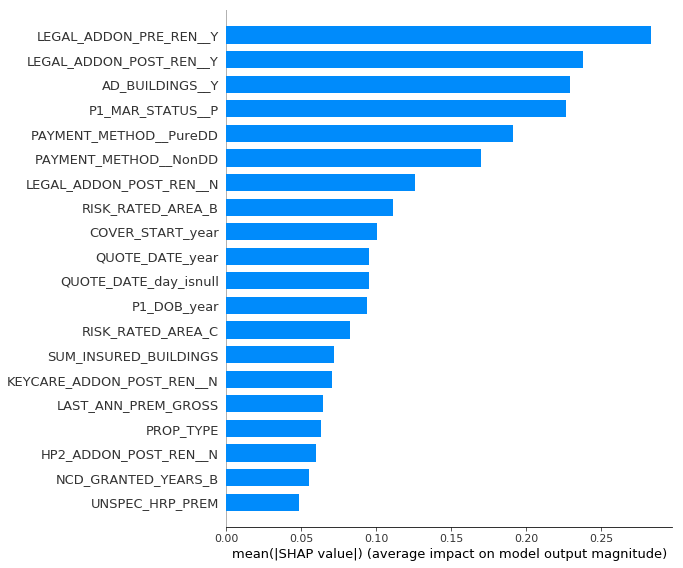

In [168]:
shap.summary_plot(shap_values[1], X_tree, plot_type='bar')

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
shap_df = pd.DataFrame(shap_values[1], columns=X_tree.columns)

In [171]:
shap_df.head()

,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,BEDROOMS,...,P1_DOB_day_isnull,P1_DOB_month_isnull,P1_DOB_year_isnull,P1_DOB_weekday_isnull,P1_DOB_week_isnull,MTA_DATE_day_isnull,MTA_DATE_month_isnull,MTA_DATE_year_isnull,MTA_DATE_weekday_isnull,MTA_DATE_week_isnull
0,0.169471,-0.000466,-0.058716,-0.028648,-0.000153,-0.061142,0.082322,0.146453,0.131469,-0.006159,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.469442,0.001620,0.016551,0.052933,-0.000084,-0.042078,-0.005201,-0.010933,0.106239,0.001345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.113738,0.368794,0.205462,-0.021941,-0.000240,-0.041287,-0.006549,-0.014495,-0.028495,-0.016550,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.109155,0.279773,0.112808,-0.008384,0.000098,-0.030399,-0.003870,-0.014185,-0.023489,-0.008330,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.102575,0.004010,-0.034084,-0.004255,-0.000016,-0.029072,-0.004054,-0.015900,0.044866,-0.007032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
main_shap = shap_df.mean(axis=0).abs().sort_values(ascending=False)[:15]
main_features = main_shap.index

In [173]:
main_shap

AD_BUILDINGS__Y              0.102757
SUM_INSURED_BUILDINGS        0.071755
LEGAL_ADDON_PRE_REN__Y       0.052630
LEGAL_ADDON_POST_REN__N      0.036550
NCD_GRANTED_YEARS_B          0.035486
KEYCARE_ADDON_POST_REN__N    0.024748
KEYCARE_ADDON_PRE_REN__Y     0.015981
HOME_EM_ADDON_PRE_REN__N     0.012029
KEYCARE_ADDON_PRE_REN__N     0.011248
PAYMENT_METHOD__NonDD        0.010305
GARDEN_ADDON_PRE_REN__Y      0.010111
PAYMENT_METHOD__PureDD       0.009641
LAST_ANN_PREM_GROSS          0.009222
QUOTE_DATE_year              0.006466
AD_CONTENTS__Y               0.006394
dtype: float64

In [174]:
pd.concat([X_tree, y], axis=1).sample(5)

,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,BEDROOMS,...,P1_DOB_month_isnull,P1_DOB_year_isnull,P1_DOB_weekday_isnull,P1_DOB_week_isnull,MTA_DATE_day_isnull,MTA_DATE_month_isnull,MTA_DATE_year_isnull,MTA_DATE_weekday_isnull,MTA_DATE_week_isnull,POL_STATUS
240822,7.00000,1000000.0,3.0,11.0,50000.0,3.0,0.0,0.0,23.57,3.0,...,0,0,0,0,1,1,1,1,1,0
251379,1.00000,1000000.0,6.0,2.0,50000.0,6.0,0.0,0.0,0.00,4.0,...,0,0,0,0,1,1,1,1,1,1
11599,10.27444,0.0,0.0,4.0,50000.0,6.0,0.0,0.0,0.00,2.0,...,0,0,0,0,1,1,1,1,1,0
228505,15.00000,1000000.0,7.0,12.0,50000.0,7.0,0.0,0.0,0.00,2.0,...,0,0,0,0,1,1,1,1,1,0
183924,1.00000,1000000.0,4.0,15.0,50000.0,6.0,0.0,0.0,40.61,3.0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
X_tree[main_features].sample(5)

,AD_BUILDINGS__Y,SUM_INSURED_BUILDINGS,LEGAL_ADDON_PRE_REN__Y,LEGAL_ADDON_POST_REN__N,NCD_GRANTED_YEARS_B,KEYCARE_ADDON_POST_REN__N,KEYCARE_ADDON_PRE_REN__Y,HOME_EM_ADDON_PRE_REN__N,KEYCARE_ADDON_PRE_REN__N,PAYMENT_METHOD__NonDD,GARDEN_ADDON_PRE_REN__Y,PAYMENT_METHOD__PureDD,LAST_ANN_PREM_GROSS,QUOTE_DATE_year,AD_CONTENTS__Y
93407,1,1000000.0,1,0,6.0,1,0,0,1,1,0,0,325.16,2010.00000,1
2876,0,0.0,0,1,0.0,1,0,1,1,1,0,0,51.56,2008.00000,1
222537,1,1000000.0,1,0,7.0,1,0,1,1,1,0,0,273.50,2010.00000,0
126355,1,1000000.0,0,1,7.0,1,0,1,1,1,0,0,113.36,2009.41123,1
202618,1,1000000.0,1,0,6.0,1,0,1,1,0,0,1,122.19,2009.41123,1


In [176]:
X_tree_and_y = pd.concat([X_tree[main_features], y], axis=1)
X_tree_and_y.corr()

,AD_BUILDINGS__Y,SUM_INSURED_BUILDINGS,LEGAL_ADDON_PRE_REN__Y,LEGAL_ADDON_POST_REN__N,NCD_GRANTED_YEARS_B,KEYCARE_ADDON_POST_REN__N,KEYCARE_ADDON_PRE_REN__Y,HOME_EM_ADDON_PRE_REN__N,KEYCARE_ADDON_PRE_REN__N,PAYMENT_METHOD__NonDD,GARDEN_ADDON_PRE_REN__Y,PAYMENT_METHOD__PureDD,LAST_ANN_PREM_GROSS,QUOTE_DATE_year,AD_CONTENTS__Y,POL_STATUS
AD_BUILDINGS__Y,1.000000,0.988015,0.233124,-0.187690,0.882169,-0.010096,0.052734,-0.219626,-0.005406,0.046446,0.111205,-0.037405,0.566772,0.099642,-0.065633,0.129615
SUM_INSURED_BUILDINGS,0.988015,1.000000,0.222190,-0.197504,0.892841,-0.051231,0.050634,-0.237546,-0.048100,0.036902,0.108996,-0.047005,0.571606,0.101634,-0.109551,0.121513
LEGAL_ADDON_PRE_REN__Y,0.233124,0.222190,1.000000,-0.874158,0.188484,-0.087164,0.114047,-0.163701,-0.078690,-0.031416,0.146699,0.040730,0.206868,0.050458,0.104866,0.024172
LEGAL_ADDON_POST_REN__N,-0.187690,-0.197504,-0.874158,1.000000,-0.167852,0.149174,-0.102694,0.161979,0.118802,0.039693,-0.131386,-0.027716,-0.182783,-0.052988,-0.056386,0.097067
NCD_GRANTED_YEARS_B,0.882169,0.892841,0.188484,-0.167852,1.000000,-0.053889,0.055684,-0.187391,-0.052897,0.067340,0.068494,-0.075415,0.445506,0.060007,-0.103013,0.109127
KEYCARE_ADDON_POST_REN__N,-0.010096,-0.051231,-0.087164,0.149174,-0.053889,1.000000,-0.769360,0.123331,0.829581,-0.000409,-0.094327,0.050077,-0.068525,-0.006774,0.069365,0.044786
KEYCARE_ADDON_PRE_REN__Y,0.052734,0.050634,0.114047,-0.102694,0.055684,-0.769360,1.000000,-0.079095,-0.944619,0.021986,0.108782,-0.023493,0.066989,-0.002917,0.031515,0.008018
HOME_EM_ADDON_PRE_REN__N,-0.219626,-0.237546,-0.163701,0.161979,-0.187391,0.123331,-0.079095,1.000000,0.113439,0.131127,-0.162602,-0.105938,-0.201020,-0.000118,-0.001542,0.018899
KEYCARE_ADDON_PRE_REN__N,-0.005406,-0.048100,-0.078690,0.118802,-0.052897,0.829581,-0.944619,0.113439,1.000000,0.003212,-0.096312,0.044128,-0.068875,-0.000633,0.074561,0.007271
PAYMENT_METHOD__NonDD,0.046446,0.036902,-0.031416,0.039693,0.067340,-0.000409,0.021986,0.131127,0.003212,1.000000,-0.054809,-0.905944,-0.102768,0.117191,-0.006646,0.158236


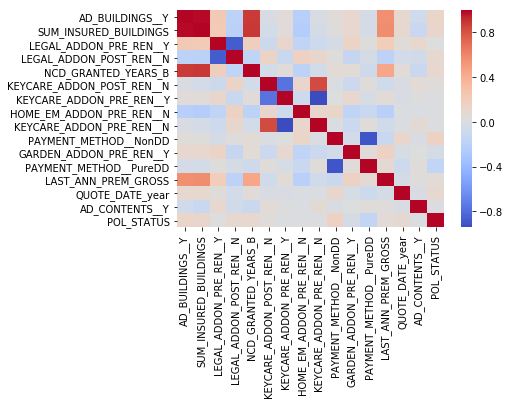

In [177]:
sns.heatmap(X_tree_and_y.corr(), cmap="coolwarm")

In [178]:
X_tree_and_y = pd.concat([X_tree, y], axis=1)
X_tree_and_y.groupby(["AD_BUILDINGS__Y"])["POL_STATUS"].mean()

AD_BUILDINGS__Y
0    0.168887
1    0.307682
Name: POL_STATUS, dtype: float64

In [179]:
correlation = pd.DataFrame(columns=["correlation_with_y"])
for col in X_tree.columns:
    print(np.corrcoef(X_tree[col], y.values)[1,0])
    correlation.loc[col,"correlation_with_y"] = np.corrcoef(X_tree[col].values, y.values)[1,0]

0.08416754512615436
0.12151349531601142
0.10912685664688672
0.08767230390932532
-0.00851550179012933
-0.005980611518264969
0.049750198107992825
0.04829589190815693
0.011794160381859136
0.07795351056474963
0.0035735901385567006
-0.006142552620357775
-0.00361584206319753
0.14887437983411386
-0.033107133250838354
0.004447660648410917
-0.04900552212789479
-0.018788748490485542
0.03282568493866977
-0.009085461056864523
0.06081546138174516
-0.00045937107458007484
0.008859427003033974
0.08938353989536038
0.0021070373678198197
0.0077244297488113225
0.013575746686741485
0.0341600411301563
0.1529972043068815
0.004899237775867465
0.03538713205114914
0.0035058390438300582
-0.0025259962074203686
0.055187571540707
0.0012383664060925223
-0.002258791820063714
-0.001970315349759674
0.004759429682088515
0.0007112036143664521
0.00195991127340061
0.004216816685050118
0.012481973549478172
-0.0124819735494784
-0.015486492194668258
0.01420876717037759
0.025472436602331665
0.009201171803803563
0.0026091848816

In [180]:
correlation.sample(5)

,correlation_with_y
SEC_DISC_REQ__Y,0.0263048
WALL_CONSTRUCTION_isnull,-0.0453607
P1_EMP_STATUS__F,-0.000968433
CONTENTS_COVER__Y,0.129615
COVER_START_month_isnull,-0.0453607


In [181]:
correlation.abs().sort_values(by = "correlation_with_y", ascending=False)

,correlation_with_y
P1_MAR_STATUS__P,0.171655
QUOTE_DATE_weekday_isnull,0.160405
QUOTE_DATE_week_isnull,0.160405
QUOTE_DATE_day_isnull,0.160405
QUOTE_DATE_month_isnull,0.160405
QUOTE_DATE_year_isnull,0.160405
PAYMENT_METHOD__NonDD,0.158236
COVER_START_year,0.152997
PAYMENT_METHOD__PureDD,0.150596
MAX_DAYS_UNOCC,0.148874


In [182]:
for col in ["QUOTE_DATE_weekday_isnull",
"QUOTE_DATE_week_isnull",
"QUOTE_DATE_day_isnull",
"QUOTE_DATE_month_isnull",
"QUOTE_DATE_year_isnull"]:

   print( X_tree_and_y.groupby([col])["POL_STATUS"].mean())

QUOTE_DATE_weekday_isnull
0    0.360837
1    0.215459
Name: POL_STATUS, dtype: float64
QUOTE_DATE_week_isnull
0    0.360837
1    0.215459
Name: POL_STATUS, dtype: float64
QUOTE_DATE_day_isnull
0    0.360837
1    0.215459
Name: POL_STATUS, dtype: float64
QUOTE_DATE_month_isnull
0    0.360837
1    0.215459
Name: POL_STATUS, dtype: float64
QUOTE_DATE_year_isnull
0    0.360837
1    0.215459
Name: POL_STATUS, dtype: float64


In [186]:
to_binarize = []
for col in data.columns:
    if set(data.loc[data[col].notna(), col].unique()) == {"Y", "N"}:
        to_binarize.append(col)

data[to_binarize]= data[to_binarize].apply(lambda col: col.map({"Y":1, "N":0}))

In [187]:
to_binarize

['CLAIM3YEARS',
 'BUS_USE',
 'CLERICAL',
 'AD_BUILDINGS',
 'AD_CONTENTS',
 'CONTENTS_COVER',
 'BUILDINGS_COVER',
 'P1_POLICY_REFUSED',
 'APPR_ALARM',
 'APPR_LOCKS',
 'FLOODING',
 'NEIGH_WATCH',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 'SUBSIDENCE',
 'LEGAL_ADDON_PRE_REN',
 'LEGAL_ADDON_POST_REN',
 'HOME_EM_ADDON_PRE_REN',
 'HOME_EM_ADDON_POST_REN',
 'GARDEN_ADDON_PRE_REN',
 'GARDEN_ADDON_POST_REN',
 'KEYCARE_ADDON_PRE_REN',
 'KEYCARE_ADDON_POST_REN',
 'HP1_ADDON_PRE_REN',
 'HP1_ADDON_POST_REN',
 'HP2_ADDON_PRE_REN',
 'HP2_ADDON_POST_REN',
 'HP3_ADDON_PRE_REN',
 'HP3_ADDON_POST_REN',
 'MTA_FLAG']

In [247]:
data["SUM_INSURED_BUILDINGS"].isna().sum()

1018

In [248]:
data["SUM_INSURED_CONTENTS"].isna().sum()

1018

In [253]:
multiple_values_categorical_features = list(data.select_dtypes(exclude = [np.number]).dtypes.index)
print(multiple_values_categorical_features)

['QUOTE_DATE', 'COVER_START', 'CLAIM3YEARS', 'P1_EMP_STATUS', 'P1_PT_EMP_STATUS', 'BUS_USE', 'CLERICAL', 'AD_BUILDINGS', 'AD_CONTENTS', 'CONTENTS_COVER', 'BUILDINGS_COVER', 'P1_DOB', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'FLOODING', 'NEIGH_WATCH', 'OCC_STATUS', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE', 'PAYMENT_METHOD', 'LEGAL_ADDON_PRE_REN', 'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_PRE_REN', 'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_PRE_REN', 'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_PRE_REN', 'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_PRE_REN', 'HP1_ADDON_POST_REN', 'HP2_ADDON_PRE_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_PRE_REN', 'HP3_ADDON_POST_REN', 'MTA_FLAG', 'MTA_DATE', 'POL_STATUS']


In [260]:
employment_mapping = {"R" : "Retired",
"E" : "Employed",
"N" : "Not Available",
"H" : "House person",
"S" : "Student",
"U" : "Unemployed"}

In [269]:
data_ = data.copy()
data_["P1_EMP_STATUS"] = data_["P1_EMP_STATUS"].map(employment_mapping)
count = data_.groupby(["P1_EMP_STATUS"])["POL_STATUS"].value_counts()
# Change: groupby state_office and divide by sum
print(count.groupby(level=0).apply(lambda x:
                                                 round(100 * x / int(x.sum()), 0)))


P1_EMP_STATUS  POL_STATUS
Employed       Live          68.0
               Lapsed        29.0
               Cancelled      3.0
               Unknown        0.0
House person   Live          63.0
               Lapsed        33.0
               Cancelled      4.0
Not Available  Live          67.0
               Lapsed        29.0
               Cancelled      4.0
Retired        Live          71.0
               Lapsed        27.0
               Cancelled      2.0
               Unknown        0.0
Student        Live          60.0
               Lapsed        37.0
               Cancelled      3.0
               Unknown        0.0
Unemployed     Live          68.0
               Lapsed        29.0
               Cancelled      3.0
Name: POL_STATUS, dtype: float64


[Text(0, 0, 'Retired'),
 Text(0, 0, 'Employed'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'House person'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Not Available')]

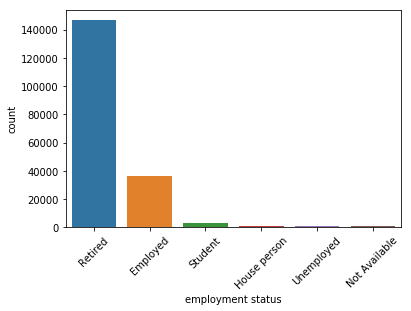

In [311]:
employment = data_['P1_EMP_STATUS'].value_counts().to_frame().reset_index()
employment = employment.rename({"index": "employment status", "P1_EMP_STATUS": "count"}, axis=1)
employment_plot = sns.barplot(data = employment, x="employment status", y="count")
employment_plot.set_xticklabels(employment_plot.get_xticklabels(), rotation=45)

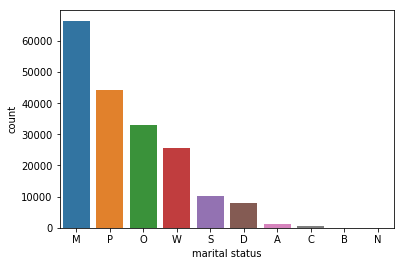

In [308]:
marital_status = data_['P1_MAR_STATUS'].value_counts().to_frame().reset_index()
marital_status = marital_status.rename({"index": "marital status", "P1_MAR_STATUS": "count"}, axis=1)
sns.barplot(data = marital_status, x="marital status", y="count")

In [ ]:
data_.c